In [2]:
library('stringr')
library('dplyr')
library('tidyr')
library('ggplot2')
library('stringr')
library('pheatmap')
options(jupyter.plot_mimetypes = 'image/png') # output SVG
options(ggrepel.max.overlaps = Inf)

In [3]:
save_pheatmap_pdf <- function(x, filename, width=6, height=20) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

In [5]:
Zp<-function(p){-qnorm (p/2)} # Transformation to Z scores
#path to where the data folder is kept
path_to_files <- "~/data/PooledScreen_V1_MAGeCK_outputs/"
datasets <- c('APOEuptake', 'BafA1', 'Bodipy', 'Diff', 'DQBSA', 'Gcase_diff', 'LDLuptake', 'LLOMe', 'Lysotracker', 'Survival', 'TREM2')

df = read.csv(paste0(path_to_files,'APOEuptake_CRISPRi_output/APOEuptake_CRISPRi.gene_summary.txt'), sep = '\t')

CRISPRi_zscore_table = data.frame('id' = df$id)

for (dataset in datasets){
  df = read.csv(paste0(path_to_files,dataset,'_CRISPRi_output/',dataset,'_CRISPRi.gene_summary.txt'), sep = '\t')
  df = df[,c('id', 'neg.p.value', 'pos.p.value', 'neg.lfc')]
  df$p.value = with(df,pmin(neg.p.value,pos.p.value))
  df$Z.score = Zp(df$p.value) * sign(df$neg.lfc)
  CRISPRi_zscore_table = merge(CRISPRi_zscore_table, df[,c('id', 'Z.score')], by = 'id')
  CRISPRi_zscore_table = rename(CRISPRi_zscore_table, !!dataset:=Z.score)
}

df = read.csv(paste0(path_to_files,'APOEuptake_CRISPRa_output/APOEuptake_CRISPRa.gene_summary.txt'), sep = '\t')
CRISPRa_zscore_table = data.frame('id' = df$id)

for (dataset in datasets){
  df = read.csv(paste0(path_to_files,dataset,'_CRISPRa_output/',dataset,'_CRISPRa.gene_summary.txt'), sep = '\t')
  df = df[,c('id', 'neg.p.value', 'pos.p.value', 'neg.lfc')]
  df$p.value = with(df,pmin(neg.p.value,pos.p.value))
  df$Z.score = Zp(df$p.value) * sign(df$neg.lfc)
  CRISPRa_zscore_table = merge(CRISPRa_zscore_table, df[,c('id', 'Z.score')], by = 'id')
  CRISPRa_zscore_table = rename(CRISPRa_zscore_table, !!dataset:=Z.score)
}

In [6]:
rownames(CRISPRi_zscore_table) = CRISPRi_zscore_table$id
rownames(CRISPRa_zscore_table) = CRISPRa_zscore_table$id

### Clustermap plots

In [7]:
CRISPRi_zscore_table = CRISPRi_zscore_table[,c('id','APOEuptake', 'BafA1', 'Bodipy', 'DQBSA', 'Gcase_diff', 'LDLuptake', 'LLOMe', 'Lysotracker', 'Survival', 'TREM2')]
colnames(CRISPRi_zscore_table) = c('id', 'APOEuptake', 'BafA1', 'Bodipy', 'DQBSA', 'Gcase activity', 'LDLuptake', 'LLOMe', 'Lysotracker', 'Survival', 'sTREM2')
rownames(CRISPRi_zscore_table) <- CRISPRi_zscore_table$id
CRISPRi_zscore_table$id <- NULL

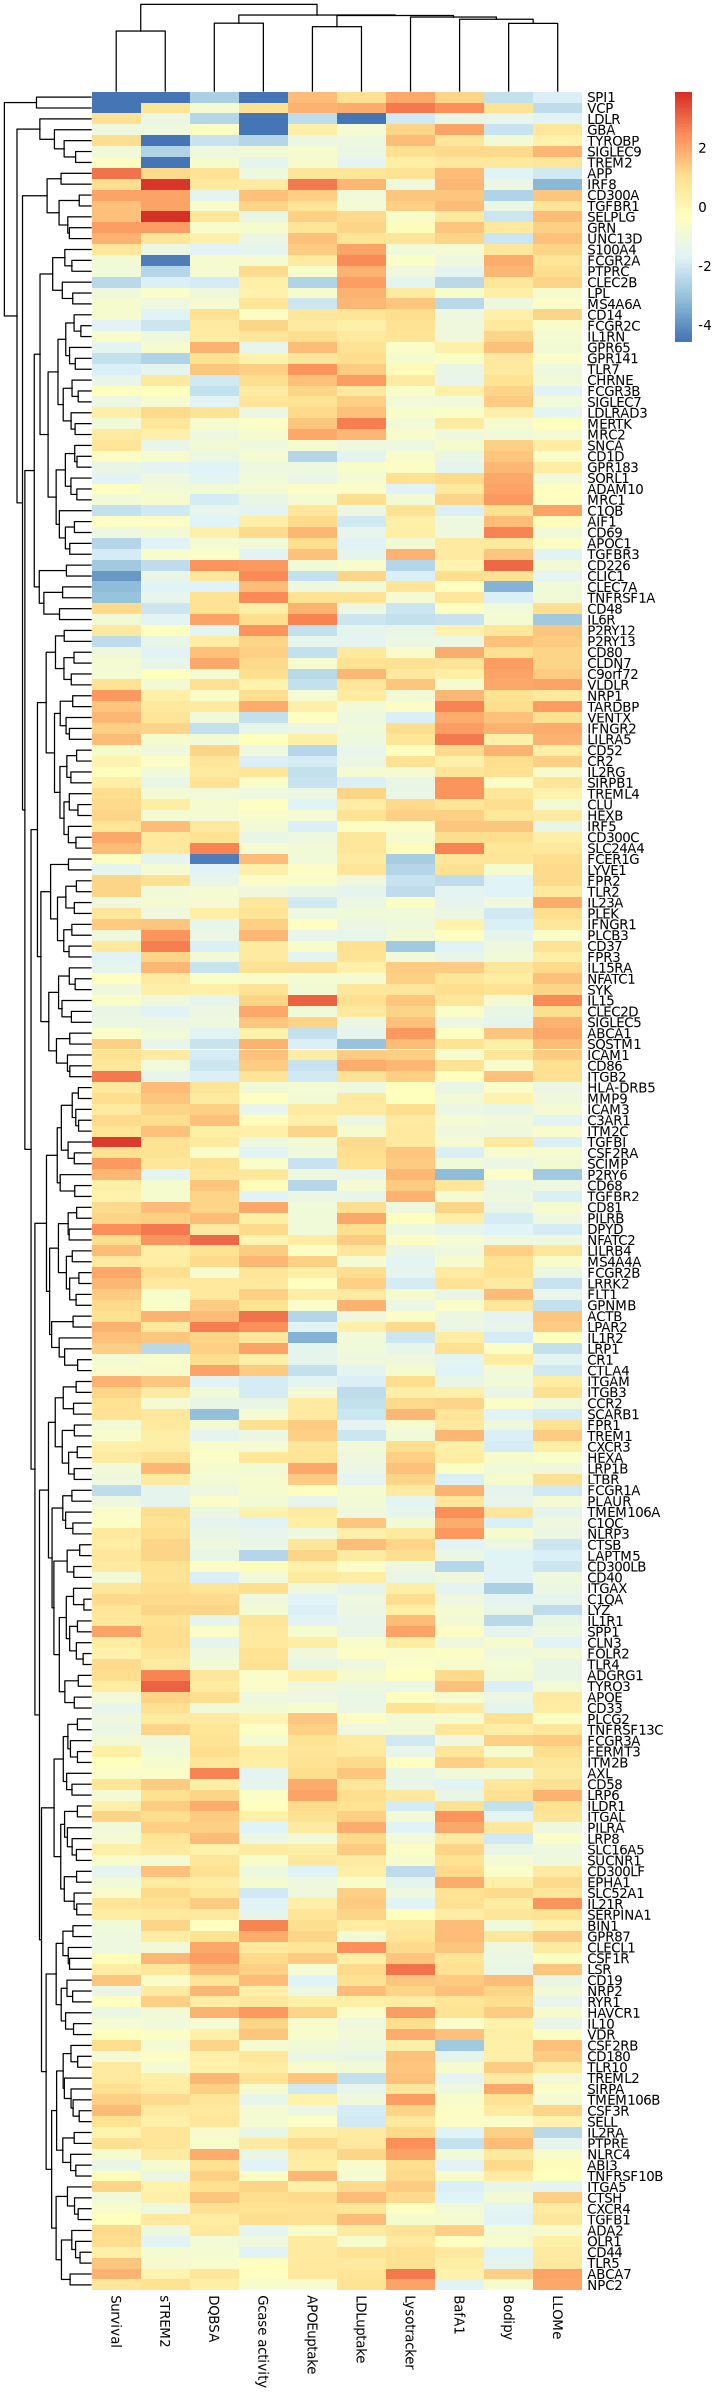

In [8]:
options(repr.plot.width = 6, repr.plot.height = 20) # set default plot size

pheatmap(CRISPRi_zscore_table, 
         fontsize = 8, 
         cluster_cols = TRUE)

#save_pheatmap_pdf(p, "/home/rwang/github/THP1_PrimaryMac_CRISPR/mageck/CRISPRi_functionalassay_heatmap.pdf")

In [9]:
CRISPRa_zscore_table = CRISPRa_zscore_table[,c('id', 'APOEuptake', 'BafA1', 'Bodipy', 'DQBSA', 'Gcase_diff', 'LDLuptake', 'LLOMe', 'Lysotracker', 'Survival', 'TREM2')]
colnames(CRISPRa_zscore_table) = c('id', 'APOEuptake', 'BafA1', 'Bodipy', 'DQBSA', 'Gcase activity', 'LDLuptake', 'LLOMe', 'Lysotracker', 'Survival', 'sTREM2')

rownames(CRISPRa_zscore_table) <- CRISPRa_zscore_table$id
CRISPRa_zscore_table$id <- NULL

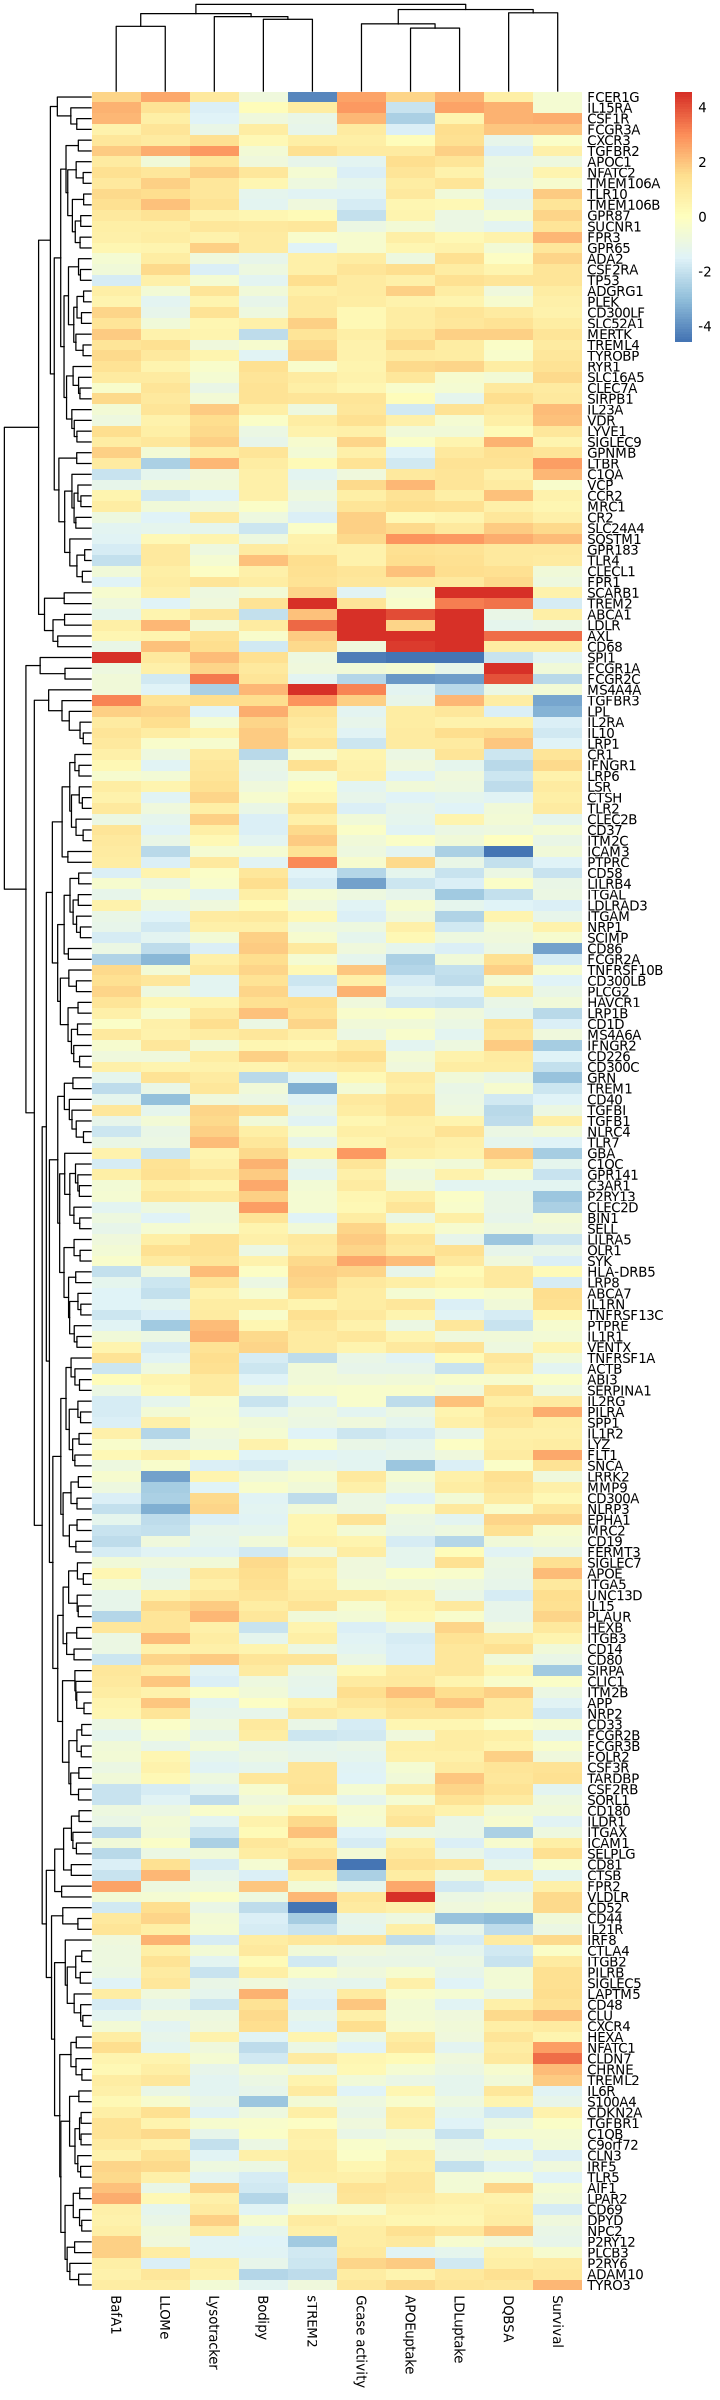

In [10]:
options(repr.plot.width = 6, repr.plot.height = 20) # set default plot size

pheatmap(CRISPRa_zscore_table, 
         fontsize = 8, 
         cluster_cols = TRUE)

#save_pheatmap_pdf(p, "/home/rwang/github/THP1_PrimaryMac_CRISPR/mageck/CRISPRa_functionalassay_heatmap.pdf")